In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.linalg import sqrtm
from scipy.signal import find_peaks
import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'

# def find_peak_2d(data):
#     result = data.copy()
#     result[:,:] = 0
#     for i in range(data.shape[1]):
#         signal = data[:,i]
#         peaks, _ = find_peaks(signal, height=0)
#         result[:,i][peaks] = 1.
#     return result

def find_peak_2d(data):
    result = data.copy()
    result[:,:] = 0
    for i in range(data.shape[1]):
        signal = data[:,i]
        peaks1, _ = find_peaks(signal, height=0)
        peaks2, _ = find_peaks(-signal, height=0)
        result[:,i][peaks1] = data[:,i][peaks1]
        result[:,i][peaks2] = data[:,i][peaks2]
    return result

def gen_patch4(arr):
    output = []  
    for i in range(len(arr)):
        output.append(arr[i][:,:128])
        output.append(arr[i][:,128:256])
        output.append(arr[i][:,256:384])
        output.append(arr[i][:,384:])
    return np.array(output)

def minmax_scaler(data):
    scaled = []
    for d in data:
        scaled.append((d - np.min(d)) / (np.max(d) - np.min(d)))
    return np.array(scaled)

def FID_from_vec(act1, act2):
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
            covmean = covmean.real
    # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

def FID_from_imgs(imgs1, imgs2):
    d1 = np.concatenate([imgs1,imgs1,imgs1],axis=3)
    d2 = np.concatenate([imgs2,imgs2,imgs2],axis=3)
    v1 = inception_model.predict(d1)
    v2 = inception_model.predict(d2)
    return FID_from_vec(v1,v2)

def show_grid(data,r=4,c=4,jump=1,title='',save='',cmap='gray'):
    plt.figure(figsize=(c*2+1,r*2+1))
    i = 1
    for j in range(0,len(data),jump):
        dat = data[j]
        plt.subplot(r, c, i) 
        plt.imshow(dat, cmap=cmap)
        plt.axis('off')
        i+=1
        if i > r*c: break
    if title:
        plt.suptitle(title)
    if save:
        plt.savefig(save, bbox_inches='tight', pad_inches=0)
        plt.close()
    plt.show()
    
def show_grid_v2(data,r=4,c=4,jump=1,title='',save='',cmap='gray'):
    plt.figure(figsize=(c*2+1,r*2+1))
    i = 1
    for j in range(0,len(data),jump):
        dat = data[j]
        plt.subplot(r, c, i) 
        plt.imshow(dat, cmap=cmap)
        plt.axis('off')
        i+=1
        if i > r*c: break
    if title:
        plt.suptitle(title, fontsize=15)
    if save:
        plt.savefig(save) #, bbox_inches='tight', pad_inches=0)
        plt.close()
    plt.show()

In [2]:
def standard_scaler(data):
    scaled = []
    for d in data:
        scaled.append((d - np.mean(d))/np.std(d))
    return np.array(scaled)

In [3]:
from tqdm import tqdm

In [4]:
inception_model = tf.keras.applications.InceptionV3(include_top=False, 
                                                    input_shape=(128,128,3),
                                                    weights="imagenet", 
                                                    pooling='avg')

In [5]:
step50s = list(range(50,5050,50))

In [6]:
path_p1_in    = "/h1/bhoon/20220725_pix2pix_compare/p1/F3_Input.npy"
path_p1n_1_in = "/h1/bhoon/20220725_pix2pix_compare/p1n-1/F3_Input.npy"
path_pa_in    = "/h1/bhoon/20220725_pix2pix_compare/pa/F3_Input.npy"
path_pana_in  = "/h1/bhoon/20220725_pix2pix_compare/pana/F3_Input.npy"
F3path = "/s1/bhoon/dataset/cyclegan_proj/real_f3_data/real_f3_data_raw.npy"

In [7]:
F3 = np.load(F3path).astype(np.float32)
F3 = np.swapaxes(F3,1,2)
F3 = standard_scaler(F3)
F3_patch = gen_patch4(F3)
F3.shape, F3_patch.shape
scaled_F3_patch = minmax_scaler(F3_patch)*2 -1

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:12<21:11, 12.85s/it]

  2%|▏         | 2/100 [00:21<18:47, 11.50s/it]

  3%|▎         | 3/100 [00:29<17:01, 10.53s/it]

  4%|▍         | 4/100 [00:38<16:04, 10.04s/it]

  5%|▌         | 5/100 [00:46<14:56,  9.44s/it]

  6%|▌         | 6/100 [00:54<14:05,  9.00s/it]

  7%|▋         | 7/100 [01:02<13:40,  8.83s/it]

  8%|▊         | 8/100 [01:10<13:06,  8.54s/it]

  9%|▉         | 9/100 [01:19<13:07,  8.65s/it]

 10%|█         | 10/100 [01:28<13:00,  8.67s/it]

 11%|█         | 11/100 [01:36<12:43,  8.58s/it]

 12%|█▏        | 12/100 [01:45<12:34,  8.57s/it]

 13%|█▎        | 13/100 [01:53<12:06,  8.35s/it]

 14%|█▍        | 14/100 [02:01<12:04,  8.43s/it]

 15%|█▌        | 15/100 [02:09<11:32,  8.14s/it]

 16%|█▌        | 16/100 [02:17<11:19,  8.09s/it]

 17%|█▋        | 17/100 [02:24<11:05,  8.01s/it]

 18%|█▊        | 18/100 [02:33<11:08,  8.16s/it]

 19%|█▉        | 19/100 [02:42<11:14,  8.32s/it]

 20%|██        | 20/100 [02:50<10:55,  8.19s/it]

 21%|██        | 21/100 [02:58<10:42,  8.14s/it]

 22%|██▏       | 22/100 [03:06<10:36,  8.16s/it]

 23%|██▎       | 23/100 [03:14<10:37,  8.28s/it]

 24%|██▍       | 24/100 [03:23<10:26,  8.25s/it]

 25%|██▌       | 25/100 [03:31<10:25,  8.34s/it]

 26%|██▌       | 26/100 [03:39<10:06,  8.19s/it]

 27%|██▋       | 27/100 [03:48<10:06,  8.31s/it]

 28%|██▊       | 28/100 [03:55<09:47,  8.16s/it]

 29%|██▉       | 29/100 [04:03<09:31,  8.05s/it]

 30%|███       | 30/100 [04:11<09:25,  8.08s/it]

 31%|███       | 31/100 [04:20<09:21,  8.14s/it]

 32%|███▏      | 32/100 [04:28<09:10,  8.10s/it]

 33%|███▎      | 33/100 [04:36<09:02,  8.10s/it]

 34%|███▍      | 34/100 [04:44<08:51,  8.06s/it]

 35%|███▌      | 35/100 [04:52<08:50,  8.16s/it]

 36%|███▌      | 36/100 [05:00<08:41,  8.15s/it]

 37%|███▋      | 37/100 [05:09<08:39,  8.24s/it]

 38%|███▊      | 38/100 [05:17<08:33,  8.28s/it]

 39%|███▉      | 39/100 [05:25<08:30,  8.36s/it]

 40%|████      | 40/100 [05:34<08:19,  8.33s/it]

 41%|████      | 41/100 [05:42<08:07,  8.25s/it]

 42%|████▏     | 42/100 [05:49<07:42,  7.97s/it]

 43%|████▎     | 43/100 [05:57<07:35,  7.98s/it]

 44%|████▍     | 44/100 [06:05<07:24,  7.94s/it]

 45%|████▌     | 45/100 [06:13<07:13,  7.88s/it]

 46%|████▌     | 46/100 [06:22<07:27,  8.28s/it]

 47%|████▋     | 47/100 [06:30<07:22,  8.34s/it]

 48%|████▊     | 48/100 [06:38<07:03,  8.14s/it]

 49%|████▉     | 49/100 [06:47<07:11,  8.47s/it]

 50%|█████     | 50/100 [06:56<07:04,  8.49s/it]

 51%|█████     | 51/100 [07:04<06:50,  8.37s/it]

 52%|█████▏    | 52/100 [07:12<06:39,  8.33s/it]

 53%|█████▎    | 53/100 [07:20<06:26,  8.23s/it]

 54%|█████▍    | 54/100 [07:28<06:14,  8.15s/it]

 55%|█████▌    | 55/100 [07:37<06:10,  8.23s/it]

 56%|█████▌    | 56/100 [07:45<06:00,  8.20s/it]

 57%|█████▋    | 57/100 [07:53<05:57,  8.31s/it]

 58%|█████▊    | 58/100 [08:01<05:44,  8.20s/it]

 59%|█████▉    | 59/100 [08:10<05:45,  8.42s/it]

 60%|██████    | 60/100 [08:18<05:30,  8.26s/it]

 61%|██████    | 61/100 [08:26<05:22,  8.27s/it]

 62%|██████▏   | 62/100 [08:34<05:10,  8.16s/it]

 63%|██████▎   | 63/100 [08:43<05:03,  8.20s/it]

 64%|██████▍   | 64/100 [08:51<04:58,  8.29s/it]

 65%|██████▌   | 65/100 [08:59<04:49,  8.26s/it]

 66%|██████▌   | 66/100 [09:07<04:39,  8.22s/it]

 67%|██████▋   | 67/100 [09:15<04:26,  8.07s/it]

 68%|██████▊   | 68/100 [09:23<04:17,  8.06s/it]

 69%|██████▉   | 69/100 [09:31<04:08,  8.01s/it]

 70%|███████   | 70/100 [09:39<04:03,  8.12s/it]

 71%|███████   | 71/100 [09:48<03:58,  8.23s/it]

 72%|███████▏  | 72/100 [09:56<03:51,  8.25s/it]

 73%|███████▎  | 73/100 [10:04<03:41,  8.19s/it]

 74%|███████▍  | 74/100 [10:11<03:25,  7.89s/it]

 75%|███████▌  | 75/100 [10:19<03:13,  7.76s/it]

 76%|███████▌  | 76/100 [10:27<03:07,  7.83s/it]

 77%|███████▋  | 77/100 [10:35<03:04,  8.01s/it]

 78%|███████▊  | 78/100 [10:43<02:56,  8.03s/it]

 79%|███████▉  | 79/100 [10:51<02:47,  7.95s/it]

 80%|████████  | 80/100 [10:59<02:36,  7.85s/it]

 81%|████████  | 81/100 [11:07<02:31,  7.95s/it]

 82%|████████▏ | 82/100 [11:15<02:23,  7.97s/it]

 83%|████████▎ | 83/100 [11:23<02:16,  8.05s/it]

 84%|████████▍ | 84/100 [11:31<02:10,  8.13s/it]

 85%|████████▌ | 85/100 [11:39<02:00,  8.01s/it]

 86%|████████▌ | 86/100 [11:48<01:53,  8.11s/it]

 87%|████████▋ | 87/100 [11:55<01:41,  7.84s/it]

 88%|████████▊ | 88/100 [12:03<01:34,  7.86s/it]

 89%|████████▉ | 89/100 [12:10<01:25,  7.77s/it]

 90%|█████████ | 90/100 [12:18<01:18,  7.86s/it]

 91%|█████████ | 91/100 [12:27<01:12,  8.02s/it]

 92%|█████████▏| 92/100 [12:36<01:07,  8.42s/it]

 93%|█████████▎| 93/100 [12:44<00:58,  8.37s/it]

 94%|█████████▍| 94/100 [12:52<00:48,  8.16s/it]

 95%|█████████▌| 95/100 [13:00<00:40,  8.09s/it]

 96%|█████████▌| 96/100 [13:08<00:31,  7.96s/it]

 97%|█████████▋| 97/100 [13:16<00:24,  8.00s/it]

 98%|█████████▊| 98/100 [13:23<00:15,  7.91s/it]

 99%|█████████▉| 99/100 [13:31<00:07,  7.96s/it]

100%|██████████| 100/100 [13:39<00:00,  8.20s/it]


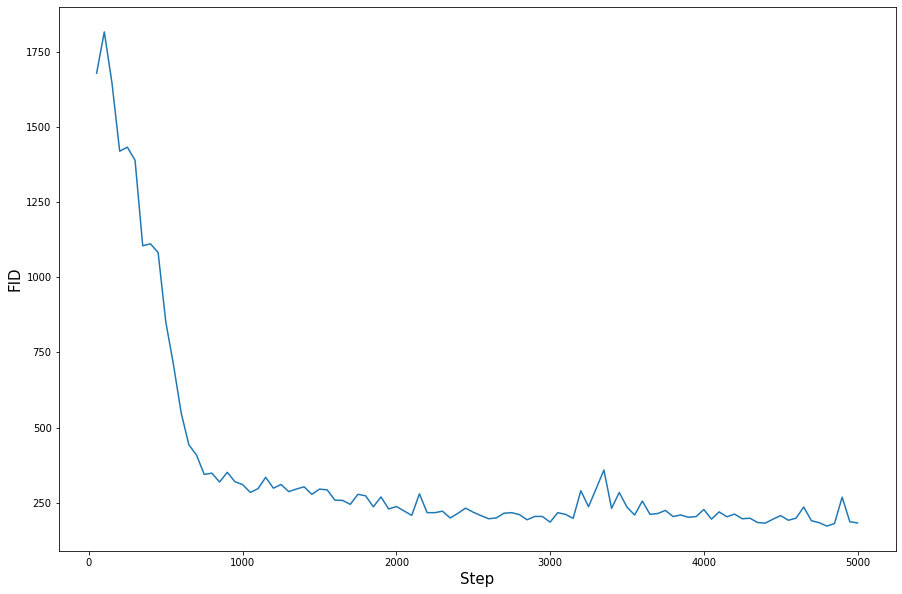

95


In [8]:
peak_data_patch = np.load(path_p1_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20220725_pix2pix_compare/p1/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20220725_pix2pix_compare/p1/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20220725_pix2pix_compare/p1/fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:08<14:18,  8.67s/it]

  2%|▏         | 2/100 [00:16<13:50,  8.47s/it]

  3%|▎         | 3/100 [00:24<13:27,  8.32s/it]

  4%|▍         | 4/100 [00:32<12:56,  8.09s/it]

  5%|▌         | 5/100 [00:40<12:56,  8.18s/it]

  6%|▌         | 6/100 [00:48<12:47,  8.17s/it]

  7%|▋         | 7/100 [00:56<12:24,  8.00s/it]

  8%|▊         | 8/100 [01:04<12:27,  8.12s/it]

  9%|▉         | 9/100 [01:12<12:12,  8.05s/it]

 10%|█         | 10/100 [01:20<12:03,  8.04s/it]

 11%|█         | 11/100 [01:28<11:53,  8.01s/it]

 12%|█▏        | 12/100 [01:36<11:42,  7.99s/it]

 13%|█▎        | 13/100 [01:44<11:38,  8.03s/it]

 14%|█▍        | 14/100 [01:52<11:31,  8.04s/it]

 15%|█▌        | 15/100 [02:00<11:20,  8.00s/it]

 16%|█▌        | 16/100 [02:09<11:29,  8.21s/it]

 17%|█▋        | 17/100 [02:17<11:19,  8.19s/it]

 18%|█▊        | 18/100 [02:25<11:08,  8.15s/it]

 19%|█▉        | 19/100 [02:33<11:05,  8.21s/it]

 20%|██        | 20/100 [02:42<10:59,  8.24s/it]

 21%|██        | 21/100 [02:49<10:39,  8.10s/it]

 22%|██▏       | 22/100 [02:57<10:21,  7.97s/it]

 23%|██▎       | 23/100 [03:06<10:26,  8.13s/it]

 24%|██▍       | 24/100 [03:14<10:23,  8.21s/it]

 25%|██▌       | 25/100 [03:22<10:20,  8.27s/it]

 26%|██▌       | 26/100 [03:30<10:04,  8.18s/it]

 27%|██▋       | 27/100 [03:39<09:56,  8.17s/it]

 28%|██▊       | 28/100 [03:47<09:51,  8.22s/it]

 29%|██▉       | 29/100 [03:55<09:32,  8.07s/it]

 30%|███       | 30/100 [04:03<09:22,  8.03s/it]

 31%|███       | 31/100 [04:10<09:07,  7.93s/it]

 32%|███▏      | 32/100 [04:18<09:02,  7.98s/it]

 33%|███▎      | 33/100 [04:26<08:51,  7.93s/it]

 34%|███▍      | 34/100 [04:35<08:58,  8.16s/it]

 35%|███▌      | 35/100 [04:43<08:50,  8.17s/it]

 36%|███▌      | 36/100 [04:51<08:45,  8.21s/it]

 37%|███▋      | 37/100 [04:59<08:30,  8.10s/it]

 38%|███▊      | 38/100 [05:07<08:20,  8.07s/it]

 39%|███▉      | 39/100 [05:15<08:01,  7.89s/it]

 40%|████      | 40/100 [05:23<07:54,  7.90s/it]

 41%|████      | 41/100 [05:31<07:54,  8.05s/it]

 42%|████▏     | 42/100 [05:40<07:59,  8.27s/it]

 43%|████▎     | 43/100 [05:48<07:56,  8.36s/it]

 44%|████▍     | 44/100 [05:56<07:39,  8.21s/it]

 45%|████▌     | 45/100 [06:04<07:25,  8.09s/it]

 46%|████▌     | 46/100 [06:12<07:15,  8.07s/it]

 47%|████▋     | 47/100 [06:21<07:22,  8.35s/it]

 48%|████▊     | 48/100 [06:29<07:12,  8.32s/it]

 49%|████▉     | 49/100 [06:38<07:12,  8.49s/it]

 50%|█████     | 50/100 [06:46<07:01,  8.43s/it]

 51%|█████     | 51/100 [06:55<06:54,  8.45s/it]

 52%|█████▏    | 52/100 [07:04<06:54,  8.63s/it]

 53%|█████▎    | 53/100 [07:14<07:04,  9.03s/it]

 54%|█████▍    | 54/100 [07:23<06:59,  9.12s/it]

 55%|█████▌    | 55/100 [07:35<07:19,  9.77s/it]

 56%|█████▌    | 56/100 [07:44<07:00,  9.56s/it]

 57%|█████▋    | 57/100 [07:53<06:54,  9.64s/it]

 58%|█████▊    | 58/100 [08:02<06:34,  9.40s/it]

 59%|█████▉    | 59/100 [08:12<06:32,  9.57s/it]

 60%|██████    | 60/100 [08:22<06:24,  9.61s/it]

 61%|██████    | 61/100 [08:32<06:21,  9.79s/it]

 62%|██████▏   | 62/100 [08:43<06:23, 10.10s/it]

 63%|██████▎   | 63/100 [08:52<06:04,  9.86s/it]

 64%|██████▍   | 64/100 [09:02<05:53,  9.81s/it]

 65%|██████▌   | 65/100 [09:11<05:34,  9.55s/it]

 66%|██████▌   | 66/100 [09:26<06:15, 11.05s/it]

 67%|██████▋   | 67/100 [09:34<05:41, 10.34s/it]

 68%|██████▊   | 68/100 [09:44<05:23, 10.10s/it]

 69%|██████▉   | 69/100 [09:53<05:05,  9.86s/it]

 70%|███████   | 70/100 [10:03<04:53,  9.77s/it]

 71%|███████   | 71/100 [10:12<04:40,  9.66s/it]

 72%|███████▏  | 72/100 [10:22<04:29,  9.64s/it]

 73%|███████▎  | 73/100 [10:30<04:11,  9.30s/it]

 74%|███████▍  | 74/100 [10:39<03:56,  9.11s/it]

 75%|███████▌  | 75/100 [10:47<03:44,  8.99s/it]

 76%|███████▌  | 76/100 [10:57<03:39,  9.14s/it]

 77%|███████▋  | 77/100 [11:06<03:28,  9.07s/it]

 78%|███████▊  | 78/100 [11:14<03:15,  8.88s/it]

 79%|███████▉  | 79/100 [11:23<03:05,  8.83s/it]

 80%|████████  | 80/100 [11:32<03:00,  9.00s/it]

 81%|████████  | 81/100 [11:41<02:50,  8.95s/it]

 82%|████████▏ | 82/100 [11:50<02:42,  9.01s/it]

 83%|████████▎ | 83/100 [11:59<02:32,  8.98s/it]

 84%|████████▍ | 84/100 [12:09<02:25,  9.12s/it]

 85%|████████▌ | 85/100 [12:18<02:16,  9.08s/it]

 86%|████████▌ | 86/100 [12:27<02:08,  9.21s/it]

 87%|████████▋ | 87/100 [12:36<01:56,  8.94s/it]

 88%|████████▊ | 88/100 [12:43<01:42,  8.52s/it]

 89%|████████▉ | 89/100 [12:51<01:32,  8.37s/it]

 90%|█████████ | 90/100 [12:59<01:23,  8.35s/it]

 91%|█████████ | 91/100 [13:07<01:13,  8.15s/it]

 92%|█████████▏| 92/100 [13:15<01:05,  8.19s/it]

 93%|█████████▎| 93/100 [13:23<00:55,  7.95s/it]

 94%|█████████▍| 94/100 [13:31<00:47,  7.87s/it]

 95%|█████████▌| 95/100 [13:38<00:39,  7.81s/it]

 96%|█████████▌| 96/100 [13:46<00:31,  7.93s/it]

 97%|█████████▋| 97/100 [13:54<00:23,  7.73s/it]

 98%|█████████▊| 98/100 [14:01<00:15,  7.53s/it]

 99%|█████████▉| 99/100 [14:09<00:07,  7.74s/it]

100%|██████████| 100/100 [14:17<00:00,  8.57s/it]


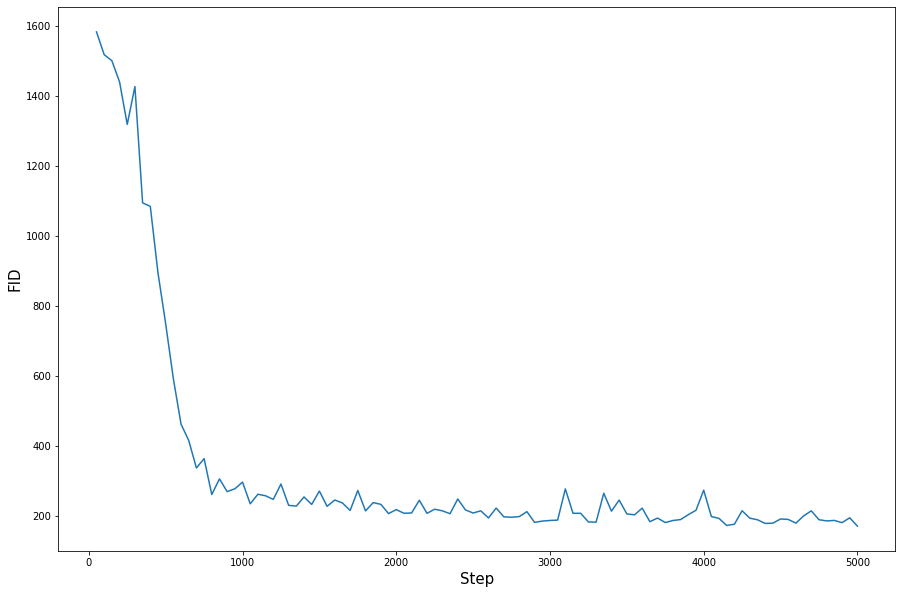

99


In [9]:
peak_data_patch = np.load(path_p1n_1_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20220725_pix2pix_compare/p1n-1/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20220725_pix2pix_compare/p1n-1/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20220725_pix2pix_compare/p1n-1/fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:08<13:35,  8.24s/it]

  2%|▏         | 2/100 [00:16<13:21,  8.18s/it]

  3%|▎         | 3/100 [00:23<12:50,  7.94s/it]

  4%|▍         | 4/100 [00:31<12:41,  7.93s/it]

  5%|▌         | 5/100 [00:39<12:22,  7.82s/it]

  6%|▌         | 6/100 [00:47<12:25,  7.93s/it]

  7%|▋         | 7/100 [00:54<12:09,  7.84s/it]

  8%|▊         | 8/100 [01:02<11:45,  7.67s/it]

  9%|▉         | 9/100 [01:09<11:31,  7.59s/it]

 10%|█         | 10/100 [01:16<11:15,  7.51s/it]

 11%|█         | 11/100 [01:24<11:11,  7.55s/it]

 12%|█▏        | 12/100 [01:32<11:22,  7.75s/it]

 13%|█▎        | 13/100 [01:40<11:25,  7.87s/it]

 14%|█▍        | 14/100 [01:49<11:25,  7.97s/it]

 15%|█▌        | 15/100 [01:57<11:30,  8.12s/it]

 16%|█▌        | 16/100 [02:05<11:24,  8.15s/it]

 17%|█▋        | 17/100 [02:13<11:12,  8.10s/it]

 18%|█▊        | 18/100 [02:21<10:55,  8.00s/it]

 19%|█▉        | 19/100 [02:29<10:46,  7.98s/it]

 20%|██        | 20/100 [02:37<10:32,  7.91s/it]

 21%|██        | 21/100 [02:45<10:24,  7.90s/it]

 22%|██▏       | 22/100 [02:53<10:15,  7.89s/it]

 23%|██▎       | 23/100 [03:01<10:14,  7.98s/it]

 24%|██▍       | 24/100 [03:09<10:10,  8.04s/it]

 25%|██▌       | 25/100 [03:17<10:03,  8.04s/it]

 26%|██▌       | 26/100 [03:25<09:52,  8.00s/it]

 27%|██▋       | 27/100 [03:32<09:32,  7.84s/it]

 28%|██▊       | 28/100 [03:40<09:22,  7.82s/it]

 29%|██▉       | 29/100 [03:48<09:14,  7.82s/it]

 30%|███       | 30/100 [03:56<09:02,  7.76s/it]

 31%|███       | 31/100 [04:03<08:53,  7.74s/it]

 32%|███▏      | 32/100 [04:11<08:54,  7.85s/it]

 33%|███▎      | 33/100 [04:19<08:48,  7.89s/it]

 34%|███▍      | 34/100 [04:27<08:27,  7.69s/it]

 35%|███▌      | 35/100 [04:35<08:32,  7.89s/it]

 36%|███▌      | 36/100 [04:43<08:27,  7.93s/it]

 37%|███▋      | 37/100 [04:51<08:30,  8.11s/it]

 38%|███▊      | 38/100 [04:59<08:21,  8.10s/it]

 39%|███▉      | 39/100 [05:08<08:25,  8.29s/it]

 40%|████      | 40/100 [05:16<08:10,  8.18s/it]

 41%|████      | 41/100 [05:24<07:49,  7.96s/it]

 42%|████▏     | 42/100 [05:31<07:39,  7.93s/it]

 43%|████▎     | 43/100 [05:39<07:31,  7.92s/it]

 44%|████▍     | 44/100 [05:48<07:31,  8.06s/it]

 45%|████▌     | 45/100 [05:55<07:15,  7.91s/it]

 46%|████▌     | 46/100 [06:03<07:04,  7.86s/it]

 47%|████▋     | 47/100 [06:11<07:03,  8.00s/it]

 48%|████▊     | 48/100 [06:20<07:05,  8.17s/it]

 49%|████▉     | 49/100 [06:28<06:55,  8.16s/it]

 50%|█████     | 50/100 [06:36<06:39,  7.98s/it]

 51%|█████     | 51/100 [06:44<06:35,  8.07s/it]

 52%|█████▏    | 52/100 [06:52<06:27,  8.07s/it]

 53%|█████▎    | 53/100 [07:00<06:12,  7.92s/it]

 54%|█████▍    | 54/100 [07:07<05:55,  7.73s/it]

 55%|█████▌    | 55/100 [07:16<06:00,  8.02s/it]

 56%|█████▌    | 56/100 [07:23<05:42,  7.77s/it]

 57%|█████▋    | 57/100 [07:30<05:29,  7.67s/it]

 58%|█████▊    | 58/100 [07:38<05:24,  7.72s/it]

 59%|█████▉    | 59/100 [07:46<05:23,  7.88s/it]

 60%|██████    | 60/100 [07:54<05:18,  7.97s/it]

 61%|██████    | 61/100 [08:03<05:20,  8.22s/it]

 62%|██████▏   | 62/100 [08:11<05:01,  7.94s/it]

 63%|██████▎   | 63/100 [08:19<04:57,  8.05s/it]

 64%|██████▍   | 64/100 [08:26<04:43,  7.88s/it]

 65%|██████▌   | 65/100 [08:35<04:43,  8.09s/it]

 66%|██████▌   | 66/100 [08:42<04:28,  7.90s/it]

 67%|██████▋   | 67/100 [08:51<04:26,  8.06s/it]

 68%|██████▊   | 68/100 [08:58<04:13,  7.92s/it]

 69%|██████▉   | 69/100 [09:07<04:09,  8.06s/it]

 70%|███████   | 70/100 [09:14<03:56,  7.87s/it]

 71%|███████   | 71/100 [09:21<03:43,  7.69s/it]

 72%|███████▏  | 72/100 [09:29<03:37,  7.76s/it]

 73%|███████▎  | 73/100 [09:37<03:26,  7.66s/it]

 74%|███████▍  | 74/100 [09:44<03:16,  7.57s/it]

 75%|███████▌  | 75/100 [09:53<03:17,  7.89s/it]

 76%|███████▌  | 76/100 [10:00<03:07,  7.79s/it]

 77%|███████▋  | 77/100 [10:08<02:58,  7.78s/it]

 78%|███████▊  | 78/100 [10:16<02:53,  7.88s/it]

 79%|███████▉  | 79/100 [10:24<02:44,  7.85s/it]

 80%|████████  | 80/100 [10:32<02:37,  7.87s/it]

 81%|████████  | 81/100 [10:40<02:30,  7.93s/it]

 82%|████████▏ | 82/100 [10:47<02:19,  7.76s/it]

 83%|████████▎ | 83/100 [10:55<02:11,  7.75s/it]

 84%|████████▍ | 84/100 [11:03<02:03,  7.74s/it]

 85%|████████▌ | 85/100 [11:11<01:56,  7.78s/it]

 86%|████████▌ | 86/100 [11:19<01:50,  7.90s/it]

 87%|████████▋ | 87/100 [11:27<01:41,  7.82s/it]

 88%|████████▊ | 88/100 [11:34<01:32,  7.73s/it]

 89%|████████▉ | 89/100 [11:43<01:29,  8.09s/it]

 90%|█████████ | 90/100 [11:50<01:18,  7.90s/it]

 91%|█████████ | 91/100 [11:58<01:10,  7.89s/it]

 92%|█████████▏| 92/100 [12:06<01:03,  7.93s/it]

 93%|█████████▎| 93/100 [12:15<00:56,  8.02s/it]

 94%|█████████▍| 94/100 [12:23<00:48,  8.12s/it]

 95%|█████████▌| 95/100 [12:31<00:39,  7.99s/it]

 96%|█████████▌| 96/100 [12:39<00:32,  8.10s/it]

 97%|█████████▋| 97/100 [12:46<00:23,  7.89s/it]

 98%|█████████▊| 98/100 [12:55<00:16,  8.17s/it]

 99%|█████████▉| 99/100 [13:03<00:07,  7.98s/it]

100%|██████████| 100/100 [13:11<00:00,  7.91s/it]


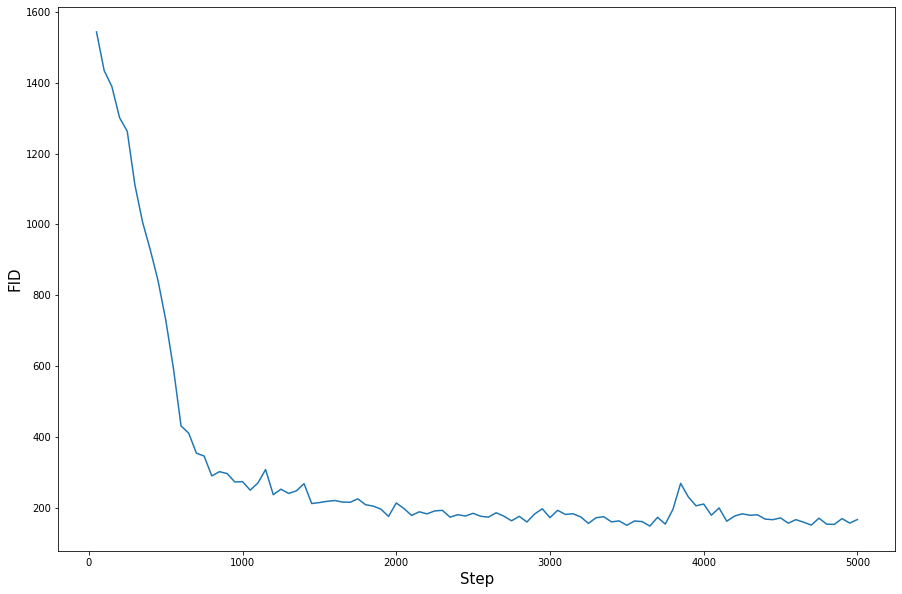

72


In [12]:
peak_data_patch = np.load(path_pa_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20220725_pix2pix_compare/pa/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20220725_pix2pix_compare/pa/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20220725_pix2pix_compare/pa/fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:07<12:43,  7.72s/it]

  2%|▏         | 2/100 [00:16<12:53,  7.89s/it]

  3%|▎         | 3/100 [00:24<12:57,  8.02s/it]

  4%|▍         | 4/100 [00:32<12:56,  8.09s/it]

  5%|▌         | 5/100 [00:40<12:47,  8.08s/it]

  6%|▌         | 6/100 [00:48<12:23,  7.91s/it]

  7%|▋         | 7/100 [00:56<12:20,  7.96s/it]

  8%|▊         | 8/100 [01:04<12:12,  7.96s/it]

  9%|▉         | 9/100 [01:12<12:10,  8.03s/it]

 10%|█         | 10/100 [01:21<12:21,  8.24s/it]

 11%|█         | 11/100 [01:28<12:03,  8.13s/it]

 12%|█▏        | 12/100 [01:36<11:46,  8.03s/it]

 13%|█▎        | 13/100 [01:44<11:28,  7.91s/it]

 14%|█▍        | 14/100 [01:51<11:11,  7.81s/it]

 15%|█▌        | 15/100 [01:59<11:07,  7.86s/it]

 16%|█▌        | 16/100 [02:07<10:47,  7.71s/it]

 17%|█▋        | 17/100 [02:15<10:56,  7.91s/it]

 18%|█▊        | 18/100 [02:23<10:42,  7.84s/it]

 19%|█▉        | 19/100 [02:31<10:31,  7.79s/it]

 20%|██        | 20/100 [02:39<10:41,  8.01s/it]

 21%|██        | 21/100 [02:47<10:30,  7.98s/it]

 22%|██▏       | 22/100 [02:55<10:25,  8.02s/it]

 23%|██▎       | 23/100 [03:04<10:38,  8.29s/it]

 24%|██▍       | 24/100 [03:12<10:15,  8.10s/it]

 25%|██▌       | 25/100 [03:19<09:51,  7.88s/it]

 26%|██▌       | 26/100 [03:27<09:54,  8.04s/it]

 27%|██▋       | 27/100 [03:35<09:38,  7.92s/it]

 28%|██▊       | 28/100 [03:44<09:45,  8.13s/it]

 29%|██▉       | 29/100 [03:51<09:27,  7.99s/it]

 30%|███       | 30/100 [04:00<09:28,  8.12s/it]

 31%|███       | 31/100 [04:08<09:14,  8.03s/it]

 32%|███▏      | 32/100 [04:16<09:10,  8.09s/it]

 33%|███▎      | 33/100 [04:24<09:00,  8.07s/it]

 34%|███▍      | 34/100 [04:33<09:04,  8.24s/it]

 35%|███▌      | 35/100 [04:41<08:58,  8.29s/it]

 36%|███▌      | 36/100 [04:48<08:35,  8.06s/it]

 37%|███▋      | 37/100 [04:56<08:22,  7.97s/it]

 38%|███▊      | 38/100 [05:04<08:17,  8.03s/it]

 39%|███▉      | 39/100 [05:13<08:22,  8.23s/it]

 40%|████      | 40/100 [05:21<08:02,  8.04s/it]

 41%|████      | 41/100 [05:29<08:07,  8.27s/it]

 42%|████▏     | 42/100 [05:37<07:52,  8.14s/it]

 43%|████▎     | 43/100 [05:45<07:38,  8.05s/it]

 44%|████▍     | 44/100 [05:53<07:24,  7.94s/it]

 45%|████▌     | 45/100 [06:01<07:22,  8.04s/it]

 46%|████▌     | 46/100 [06:09<07:10,  7.98s/it]

 47%|████▋     | 47/100 [06:17<07:00,  7.93s/it]

 48%|████▊     | 48/100 [06:25<06:49,  7.88s/it]

 49%|████▉     | 49/100 [06:33<06:51,  8.07s/it]

 50%|█████     | 50/100 [06:41<06:40,  8.02s/it]

 51%|█████     | 51/100 [06:48<06:23,  7.84s/it]

 52%|█████▏    | 52/100 [06:57<06:27,  8.07s/it]

 53%|█████▎    | 53/100 [07:05<06:21,  8.11s/it]

 54%|█████▍    | 54/100 [07:14<06:17,  8.20s/it]

 55%|█████▌    | 55/100 [07:22<06:09,  8.20s/it]

 56%|█████▌    | 56/100 [07:31<06:08,  8.38s/it]

 57%|█████▋    | 57/100 [07:39<05:58,  8.34s/it]

 58%|█████▊    | 58/100 [07:47<05:41,  8.14s/it]

 59%|█████▉    | 59/100 [07:54<05:31,  8.08s/it]

 60%|██████    | 60/100 [08:03<05:28,  8.22s/it]

 61%|██████    | 61/100 [08:11<05:14,  8.06s/it]

 62%|██████▏   | 62/100 [08:19<05:07,  8.09s/it]

 63%|██████▎   | 63/100 [08:26<04:53,  7.95s/it]

 64%|██████▍   | 64/100 [08:34<04:45,  7.92s/it]

 65%|██████▌   | 65/100 [08:43<04:40,  8.02s/it]

 66%|██████▌   | 66/100 [08:50<04:27,  7.87s/it]

 67%|██████▋   | 67/100 [08:58<04:24,  8.00s/it]

 68%|██████▊   | 68/100 [09:06<04:10,  7.84s/it]

 69%|██████▉   | 69/100 [09:14<04:06,  7.94s/it]

 70%|███████   | 70/100 [09:21<03:54,  7.80s/it]

 71%|███████   | 71/100 [09:29<03:43,  7.70s/it]

 72%|███████▏  | 72/100 [09:37<03:41,  7.92s/it]

 73%|███████▎  | 73/100 [09:45<03:29,  7.76s/it]

 74%|███████▍  | 74/100 [09:52<03:20,  7.72s/it]

 75%|███████▌  | 75/100 [09:59<03:08,  7.52s/it]

 76%|███████▌  | 76/100 [10:07<03:01,  7.58s/it]

 77%|███████▋  | 77/100 [10:15<02:58,  7.78s/it]

 78%|███████▊  | 78/100 [10:23<02:50,  7.74s/it]

 79%|███████▉  | 79/100 [10:31<02:41,  7.69s/it]

 80%|████████  | 80/100 [10:39<02:38,  7.95s/it]

 81%|████████  | 81/100 [10:47<02:30,  7.93s/it]

 82%|████████▏ | 82/100 [10:56<02:25,  8.08s/it]

 83%|████████▎ | 83/100 [11:04<02:17,  8.09s/it]

 84%|████████▍ | 84/100 [11:12<02:09,  8.07s/it]

 85%|████████▌ | 85/100 [11:20<02:02,  8.18s/it]

 86%|████████▌ | 86/100 [11:28<01:53,  8.14s/it]

 87%|████████▋ | 87/100 [11:36<01:45,  8.15s/it]

 88%|████████▊ | 88/100 [11:44<01:35,  7.94s/it]

 89%|████████▉ | 89/100 [11:52<01:28,  8.01s/it]

 90%|█████████ | 90/100 [12:00<01:20,  8.08s/it]

 91%|█████████ | 91/100 [12:09<01:13,  8.22s/it]

 92%|█████████▏| 92/100 [12:16<01:03,  7.99s/it]

 93%|█████████▎| 93/100 [12:24<00:56,  8.09s/it]

 94%|█████████▍| 94/100 [12:32<00:47,  7.86s/it]

 95%|█████████▌| 95/100 [12:39<00:38,  7.79s/it]

 96%|█████████▌| 96/100 [12:47<00:30,  7.72s/it]

 97%|█████████▋| 97/100 [12:54<00:22,  7.65s/it]

 98%|█████████▊| 98/100 [13:02<00:15,  7.67s/it]

 99%|█████████▉| 99/100 [13:10<00:07,  7.60s/it]

100%|██████████| 100/100 [13:18<00:00,  7.98s/it]


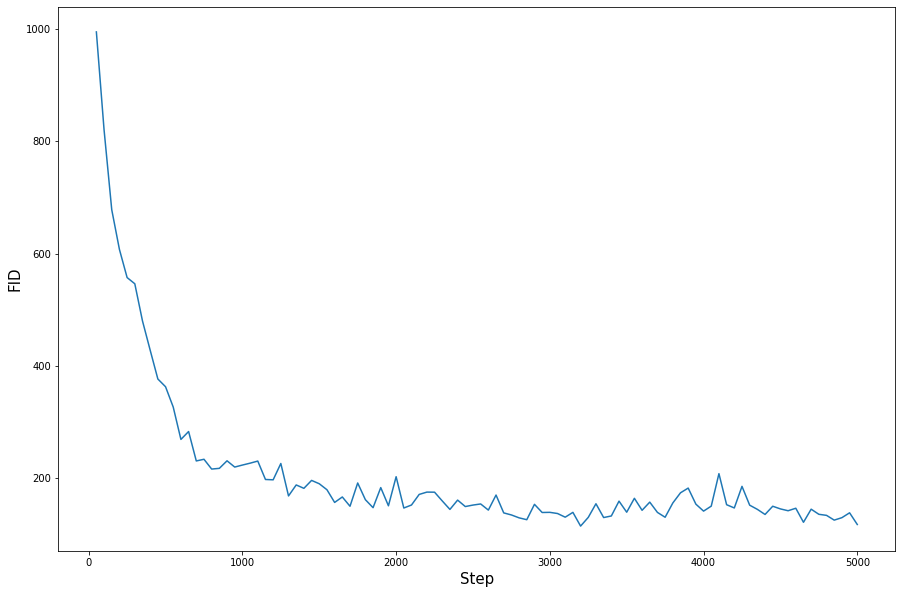

63


In [13]:
peak_data_patch = np.load(path_pana_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20220725_pix2pix_compare/pana/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20220725_pix2pix_compare/pana/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20220725_pix2pix_compare/pana/fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()